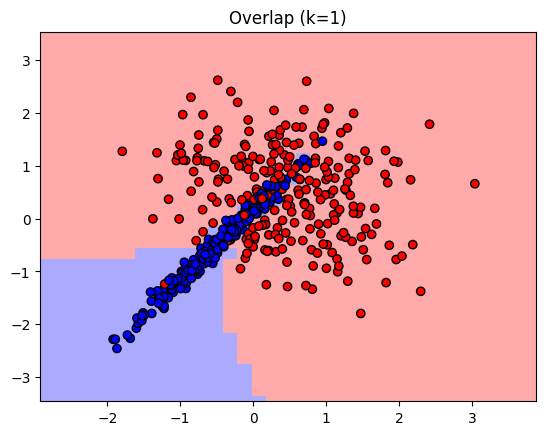

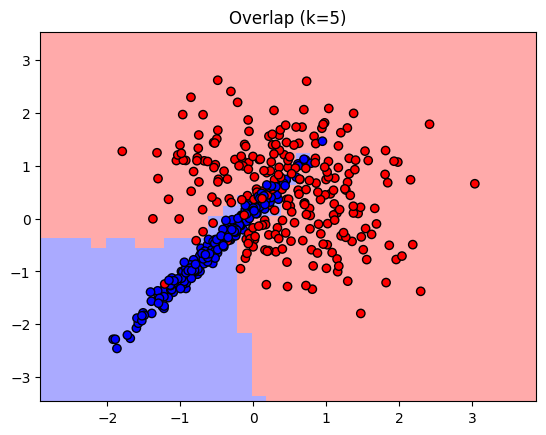

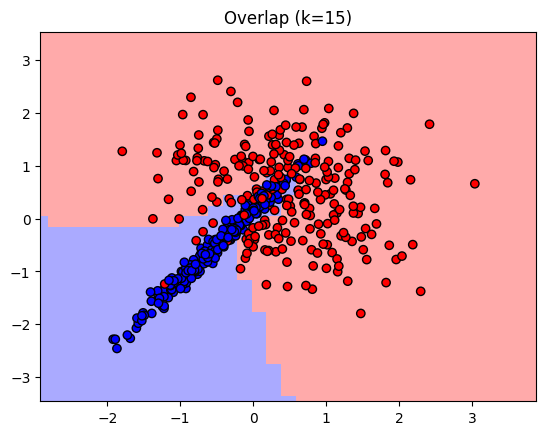

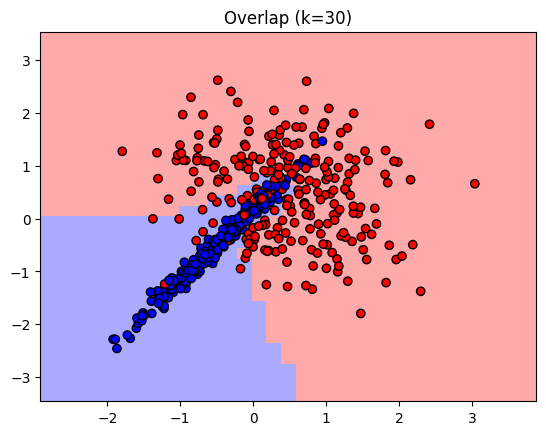

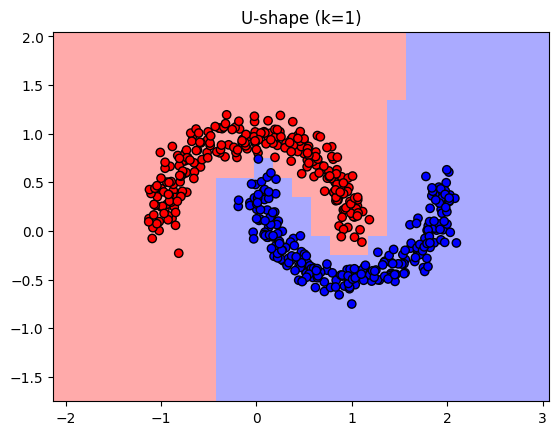

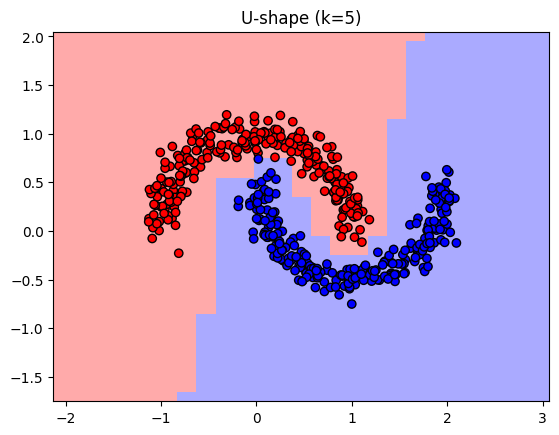

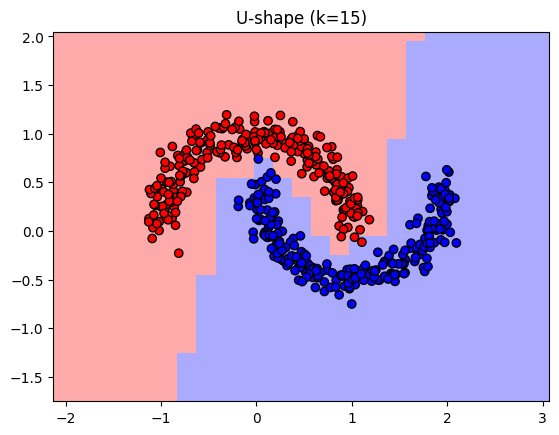

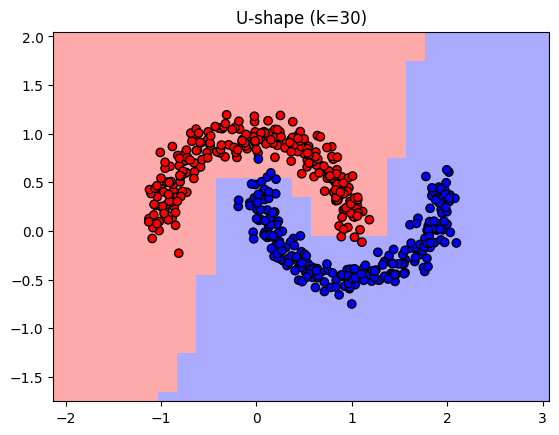

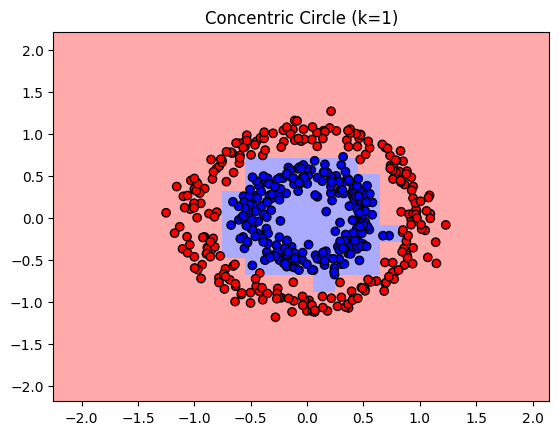

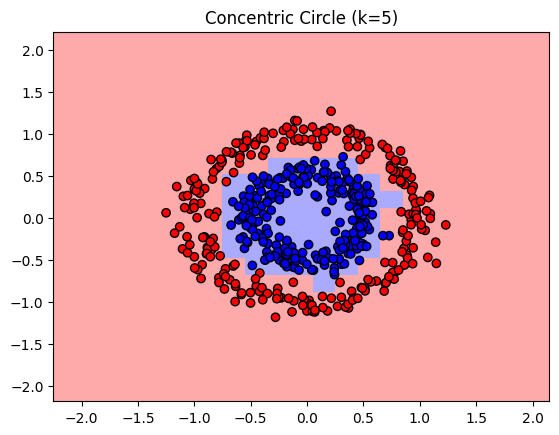

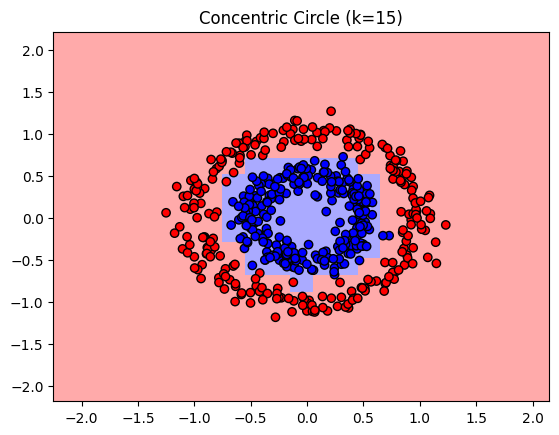

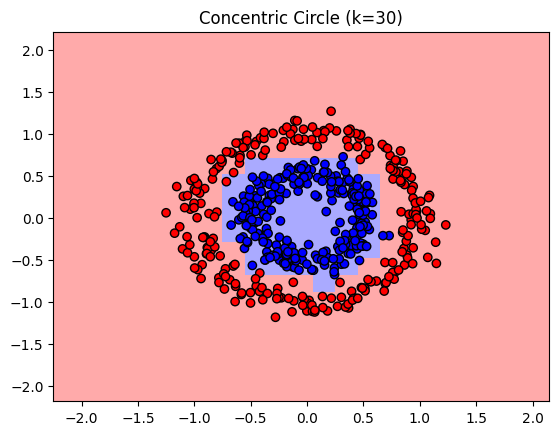

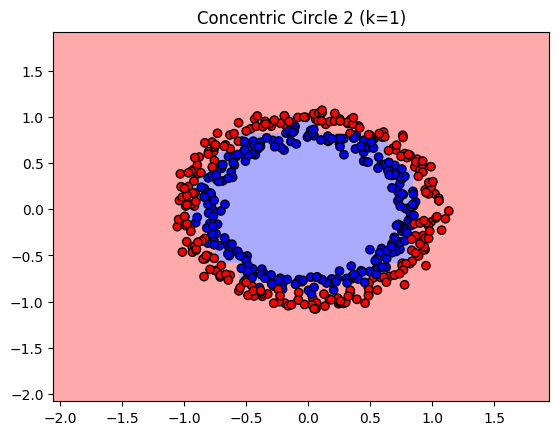

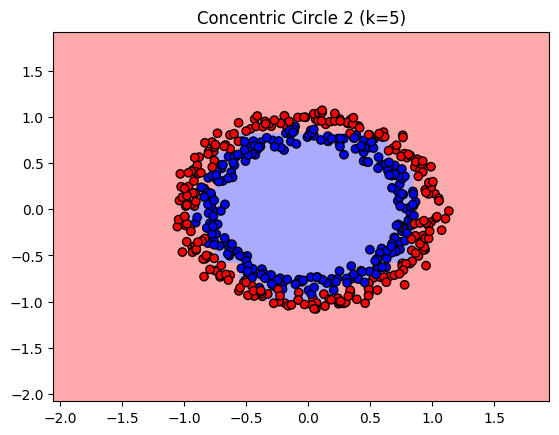

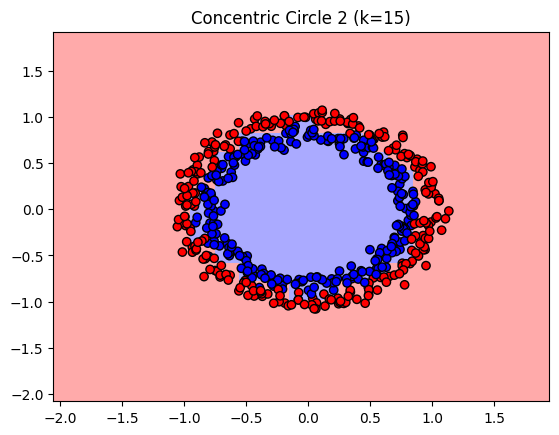

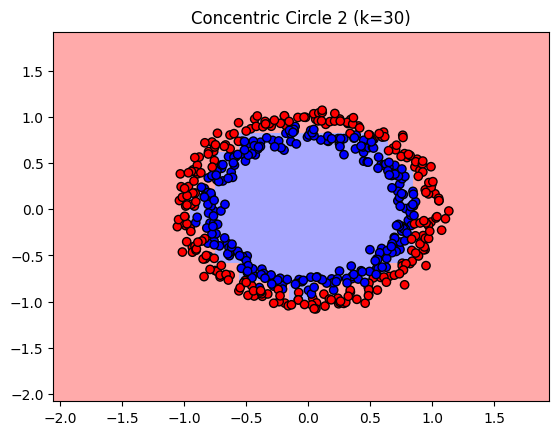

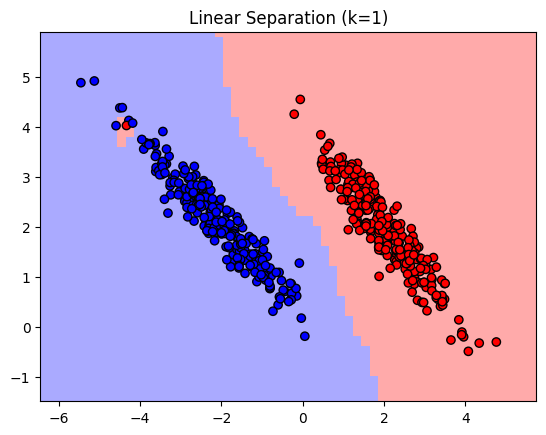

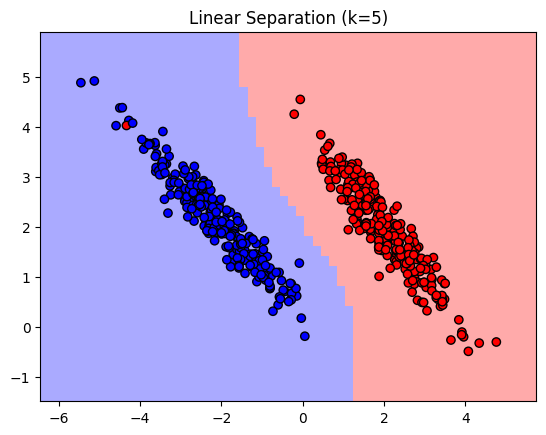

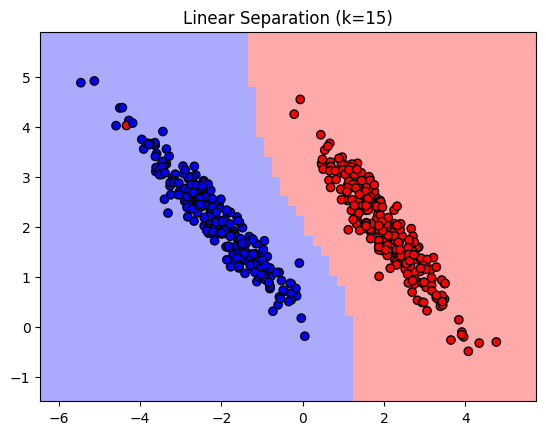

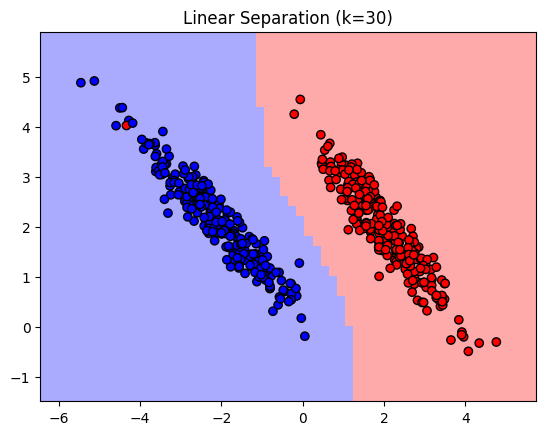

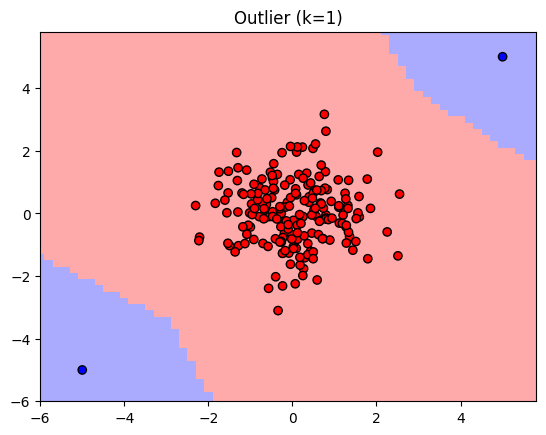

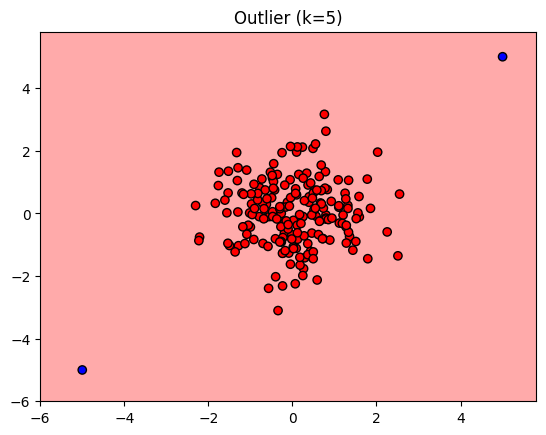

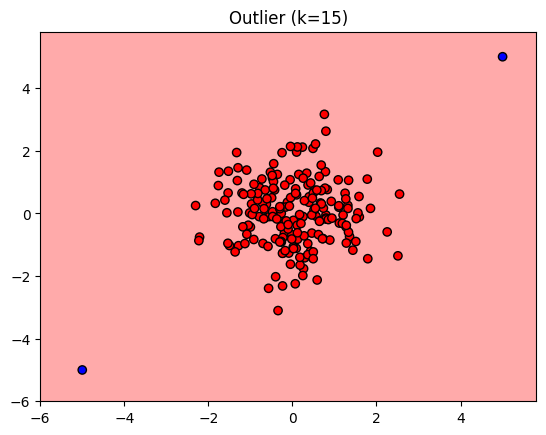

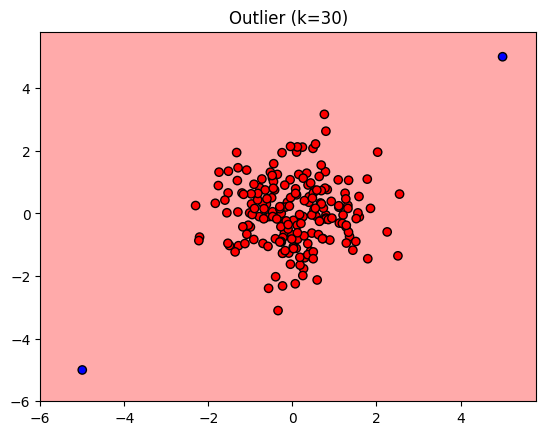

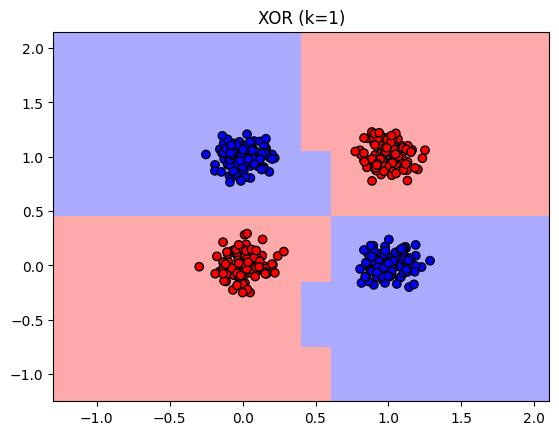

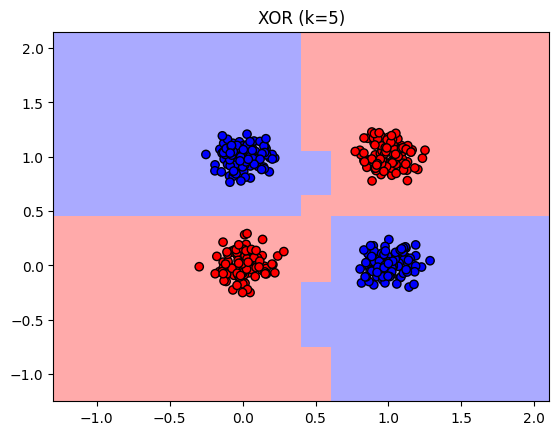

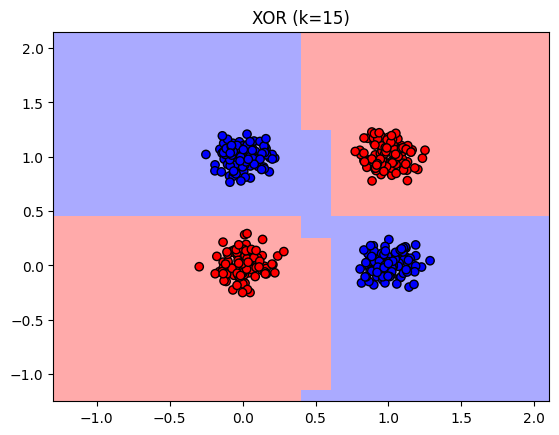

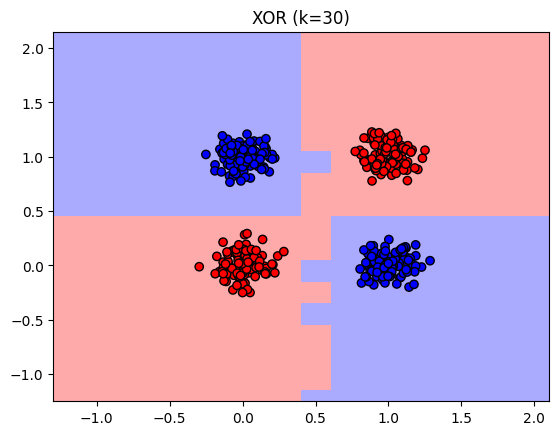

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons, make_classification

# KNN visualization function
def knn_comparison(X, y, n_neighbors=15, title=""):
    h = 0.2  # Step size for mesh grid
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Initialize and fit the classifier
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Create a mesh of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"{title} (k={n_neighbors})")
    plt.show()

# Generate datasets
datasets = {
    "Overlap": make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, n_samples=500),
    "U-shape": make_moons(n_samples=500, noise=0.1),
    "Concentric Circle": make_circles(n_samples=500, factor=0.5, noise=0.1),
    "Concentric Circle 2": make_circles(n_samples=500, factor=0.8, noise=0.05),
    "Linear Separation": make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=2, n_samples=500),
    "Outlier": (
        np.vstack([np.random.randn(200, 2), np.array([[5, 5], [-5, -5]])]),
        np.hstack([np.zeros(200), [1, 1]]),
    ),
}

# XOR dataset
X_xor = np.vstack([
    np.random.randn(100, 2) * 0.1 + [0, 0],  # Cluster near (0, 0)
    np.random.randn(100, 2) * 0.1 + [1, 1],  # Cluster near (1, 1)
    np.random.randn(100, 2) * 0.1 + [1, 0],  # Cluster near (1, 0)
    np.random.randn(100, 2) * 0.1 + [0, 1],  # Cluster near (0, 1)
])
y_xor = np.hstack([
    np.zeros(200),  # Labels for the first two clusters
    np.ones(200),   # Labels for the last two clusters
])
datasets["XOR"] = (X_xor, y_xor)

# Iterate over datasets and k values
k_values = [1, 5, 15, 30]
for name, (X, y) in datasets.items():
    for k in k_values:
        knn_comparison(X, y, n_neighbors=k, title=name)